In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Basketball.csv")
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [3]:
df.shape

(61, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [5]:
df[df["Score"] == "-"]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


Since the values of Team61 is not given, we are removing that column.

In [6]:
df.drop(index = df[df["Score"] == "-"].index, inplace=True)
df.shape

(60, 13)

In [7]:
df["TournamentChampion"].unique()

array(['33', '25', '10', '6', '8', '1', '-', '2'], dtype=object)

In [8]:
df["Runner-up"].unique()

array(['23', '25', '8', '6', '7', '4', '-', '3', '1', '5'], dtype=object)

In [9]:
df["TournamentChampion"] = df["TournamentChampion"].replace(to_replace = "-", value = 0)
df["Runner-up"] = df["Runner-up"].replace(to_replace = "-", value = 0)

In [10]:
df["TournamentChampion"].unique()

array(['33', '25', '10', '6', '8', '1', 0, '2'], dtype=object)

In [11]:
df["Runner-up"].unique()

array(['23', '25', '8', '6', '7', '4', 0, '3', '1', '5'], dtype=object)

In [12]:
df["TeamLaunch"].unique()

array(['1929', '1931to32', '1934-35', '1939-40', '1932-33', '1941to42',
       '1948-49', '1944_45', '1935-36', '1949_50', '1933to34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004to05',
       '1961-62', '1940-41', '1930-31', '1963-64', '1974-75', '1943-44',
       '1987-88', '1991_92', '2007-08', '1962-63', '1994-95', '1978-79',
       '1971-72', '1999to00', '2014-15', '1990-91', '1947-48', '1996-97',
       '1995-96', '1945-46', '1953-54', '1979-80', '1950-51', '2016_17',
       '2009-10', '1956-57', '1951~52', '1955-56'], dtype=object)

In [13]:
df["TeamLaunch"].values

array(['1929', '1929', '1929', '1931to32', '1929', '1934-35', '1929',
       '1929', '1939-40', '1932-33', '1941to42', '1939-40', '1948-49',
       '1929', '1944_45', '1935-36', '1949_50', '1933to34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004to05',
       '1935-36', '1961-62', '1940-41', '1930-31', '1963-64', '1974-75',
       '1943-44', '1977-78', '1987-88', '1941-42', '1991_92', '2007-08',
       '1962-63', '1994-95', '1978-79', '1971-72', '1963-64', '1999to00',
       '2014-15', '1929', '1990-91', '1947-48', '1996-97', '1995-96',
       '1945-46', '1953-54', '1929', '1979-80', '1929', '1950-51',
       '2016_17', '2009-10', '1956-57', '1951~52', '1955-56'],
      dtype=object)

In [14]:
df.TeamLaunch = df.TeamLaunch.str[:4]

In [15]:
df["TeamLaunch"].values

array(['1929', '1929', '1929', '1931', '1929', '1934', '1929', '1929',
       '1939', '1932', '1941', '1939', '1948', '1929', '1944', '1935',
       '1949', '1933', '1960', '1951', '1998', '1941', '1977', '1959',
       '2004', '1935', '1961', '1940', '1930', '1963', '1974', '1943',
       '1977', '1987', '1941', '1991', '2007', '1962', '1994', '1978',
       '1971', '1963', '1999', '2014', '1929', '1990', '1947', '1996',
       '1995', '1945', '1953', '1929', '1979', '1929', '1950', '2016',
       '2009', '1956', '1951', '1955'], dtype=object)

In [16]:
df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1


In [17]:
df.dtypes

Team                   object
Tournament              int64
Score                  object
PlayedGames            object
WonGames               object
DrawnGames             object
LostGames              object
BasketScored           object
BasketGiven            object
TournamentChampion     object
Runner-up              object
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

As we can see from the info of dataset, there are many variables whose datatype is given as object even though they are integers.   

Now let's try to change the datatypes of those variables into integers.

In [18]:
df_changed = df.drop(["Team", "Tournament", "HighestPositionHeld"], axis = 1)
df_changed.head()

,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch
0,4385,2762,1647,552,563,5947,3140,33,23,1929
1,4262,2762,1581,573,608,5900,3114,25,25,1929
2,3442,2614,1241,598,775,4534,3309,10,8,1929
3,3386,2664,1187,616,861,4398,3469,6,6,1931
4,3368,2762,1209,633,920,4631,3700,8,7,1929


In [19]:
df_changed.dtypes

Score                 object
PlayedGames           object
WonGames              object
DrawnGames            object
LostGames             object
BasketScored          object
BasketGiven           object
TournamentChampion    object
Runner-up             object
TeamLaunch            object
dtype: object

We need to change all the datatypes of the variables listed above.

In [20]:
for i in df_changed.columns:
    df_changed[i] = df_changed[i].astype("int64")

In [21]:
df_changed.dtypes

Score                 int64
PlayedGames           int64
WonGames              int64
DrawnGames            int64
LostGames             int64
BasketScored          int64
BasketGiven           int64
TournamentChampion    int64
Runner-up             int64
TeamLaunch            int64
dtype: object

Now all the datatypes of variables have become integer.

We will now create a new dataset.

In [22]:
df_new = pd.concat([df["Team"], df["Tournament"], df_changed, df["HighestPositionHeld"]], axis = 1)
df_new.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [23]:
df_new.dtypes

Team                   object
Tournament              int64
Score                   int64
PlayedGames             int64
WonGames                int64
DrawnGames              int64
LostGames               int64
BasketScored            int64
BasketGiven             int64
TournamentChampion      int64
Runner-up               int64
TeamLaunch              int64
HighestPositionHeld     int64
dtype: object

### Outliers

In [24]:
cols = list(df_new.select_dtypes(include = np.number).columns)
cols

['Tournament',
 'Score',
 'PlayedGames',
 'WonGames',
 'DrawnGames',
 'LostGames',
 'BasketScored',
 'BasketGiven',
 'TournamentChampion',
 'Runner-up',
 'TeamLaunch',
 'HighestPositionHeld']

Boxplots to find outliers

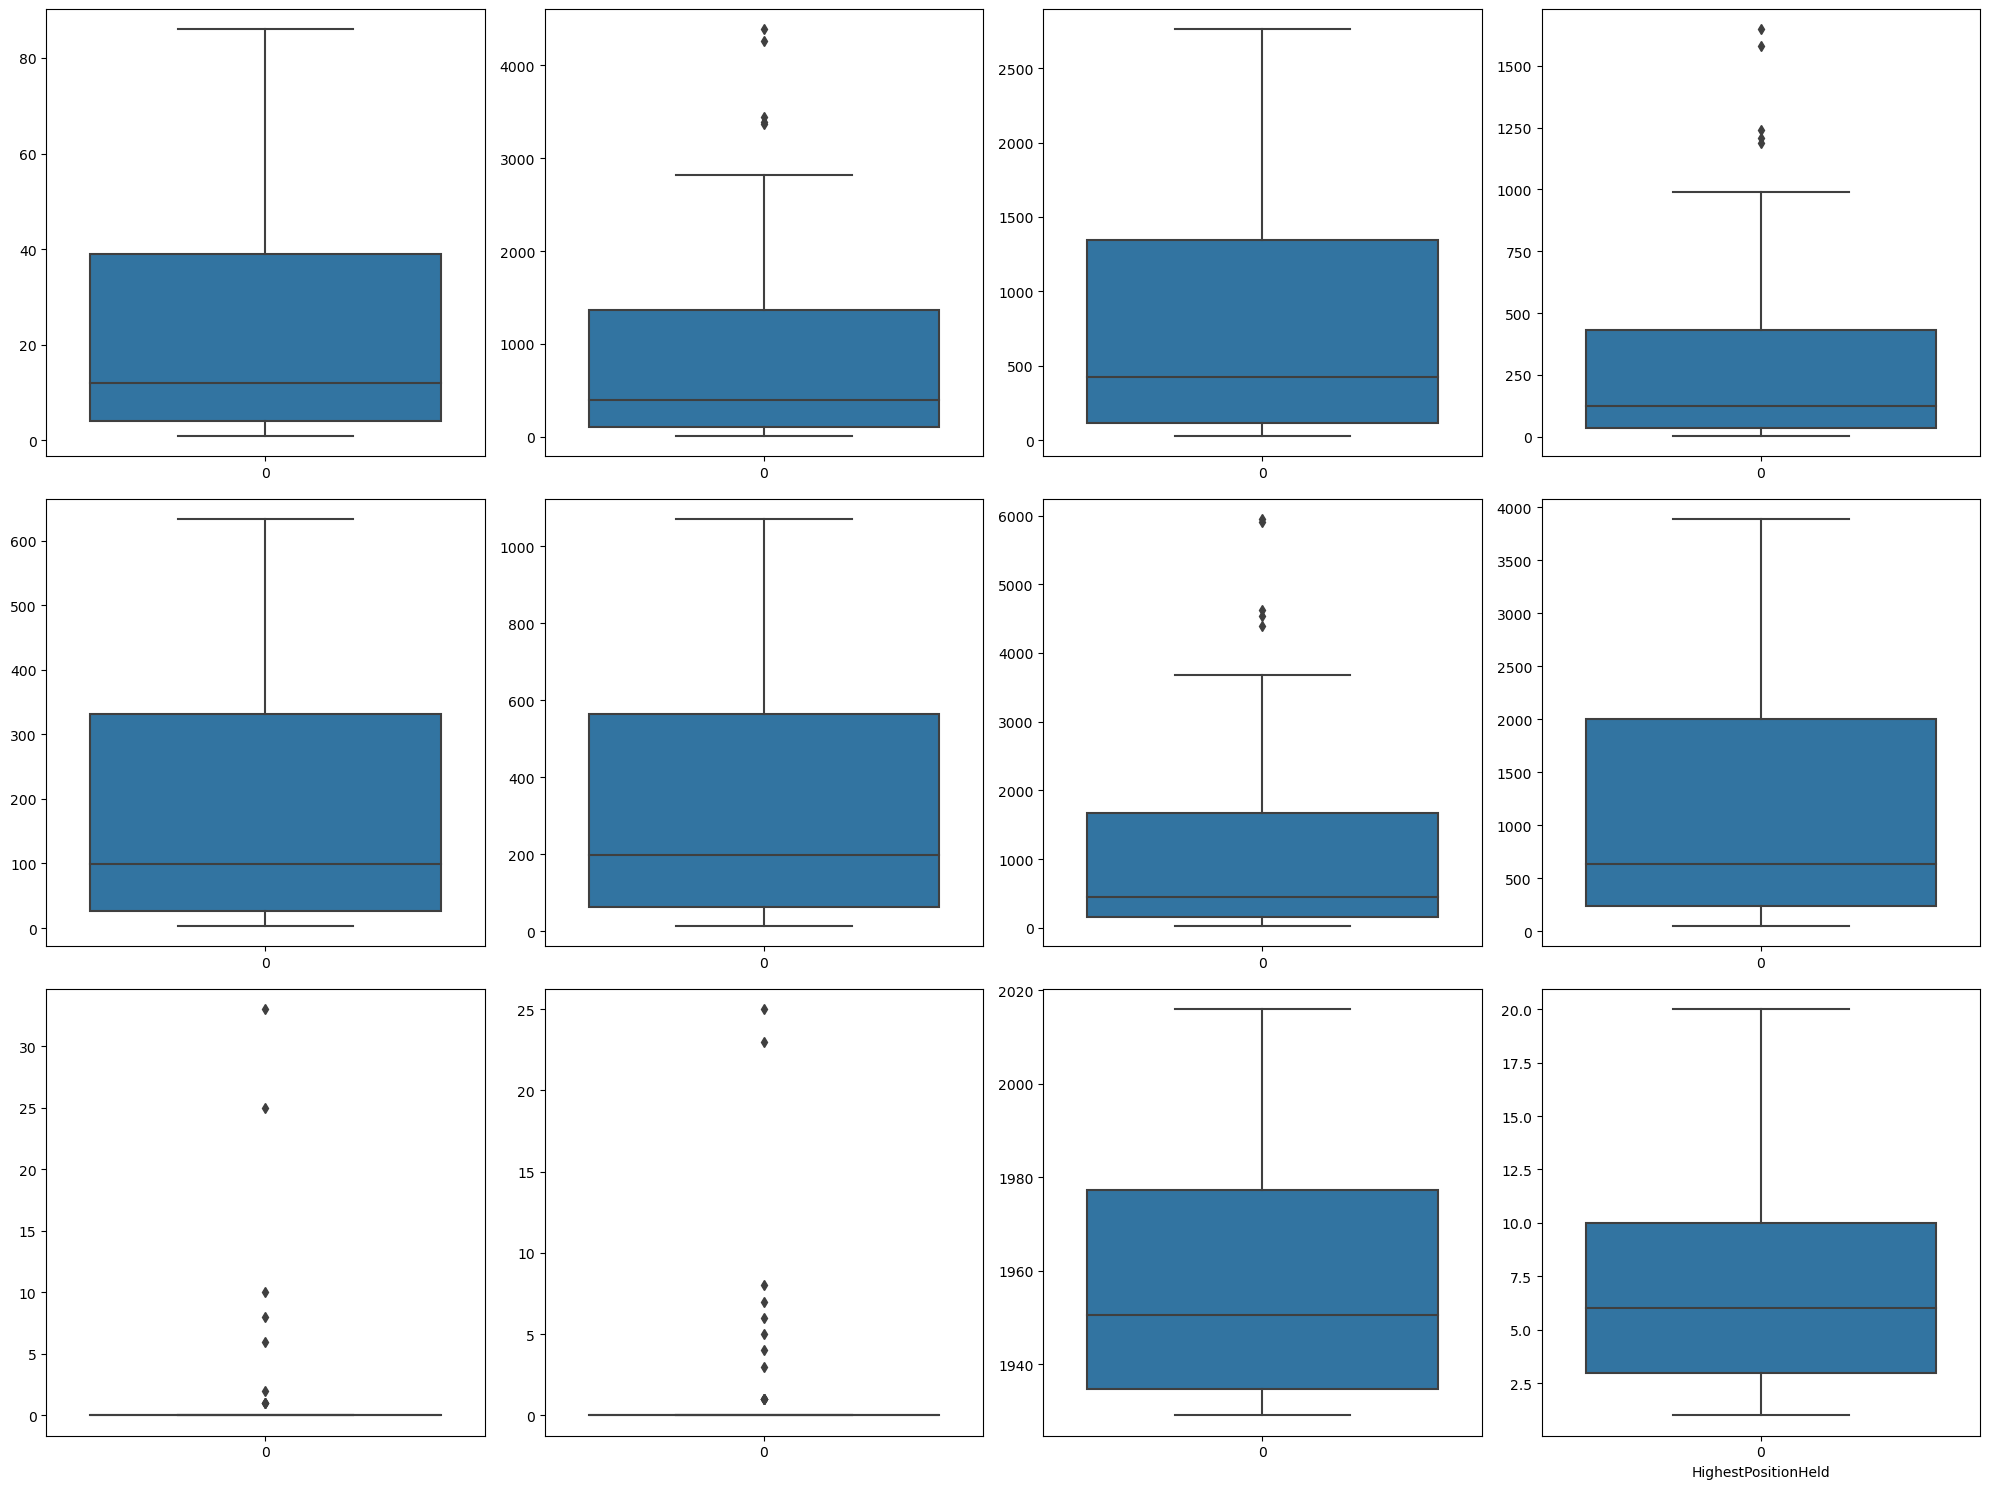

In [25]:
fig, ax = plt.subplots(3, 4, figsize = (20, 15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_new[i], ax = subplot)
    plt.xlabel(xlabel = i, loc = "center")
    
plt.tight_layout()
plt.show()

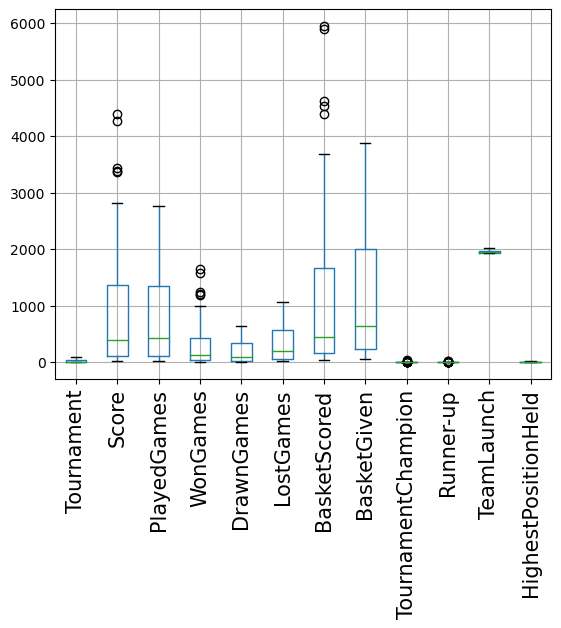

In [26]:
df_new.boxplot()

plt.xticks(rotation = "vertical", fontsize = 15)

plt.show()

### Univariate Analysis

We can draw a histogram to find out the distribution

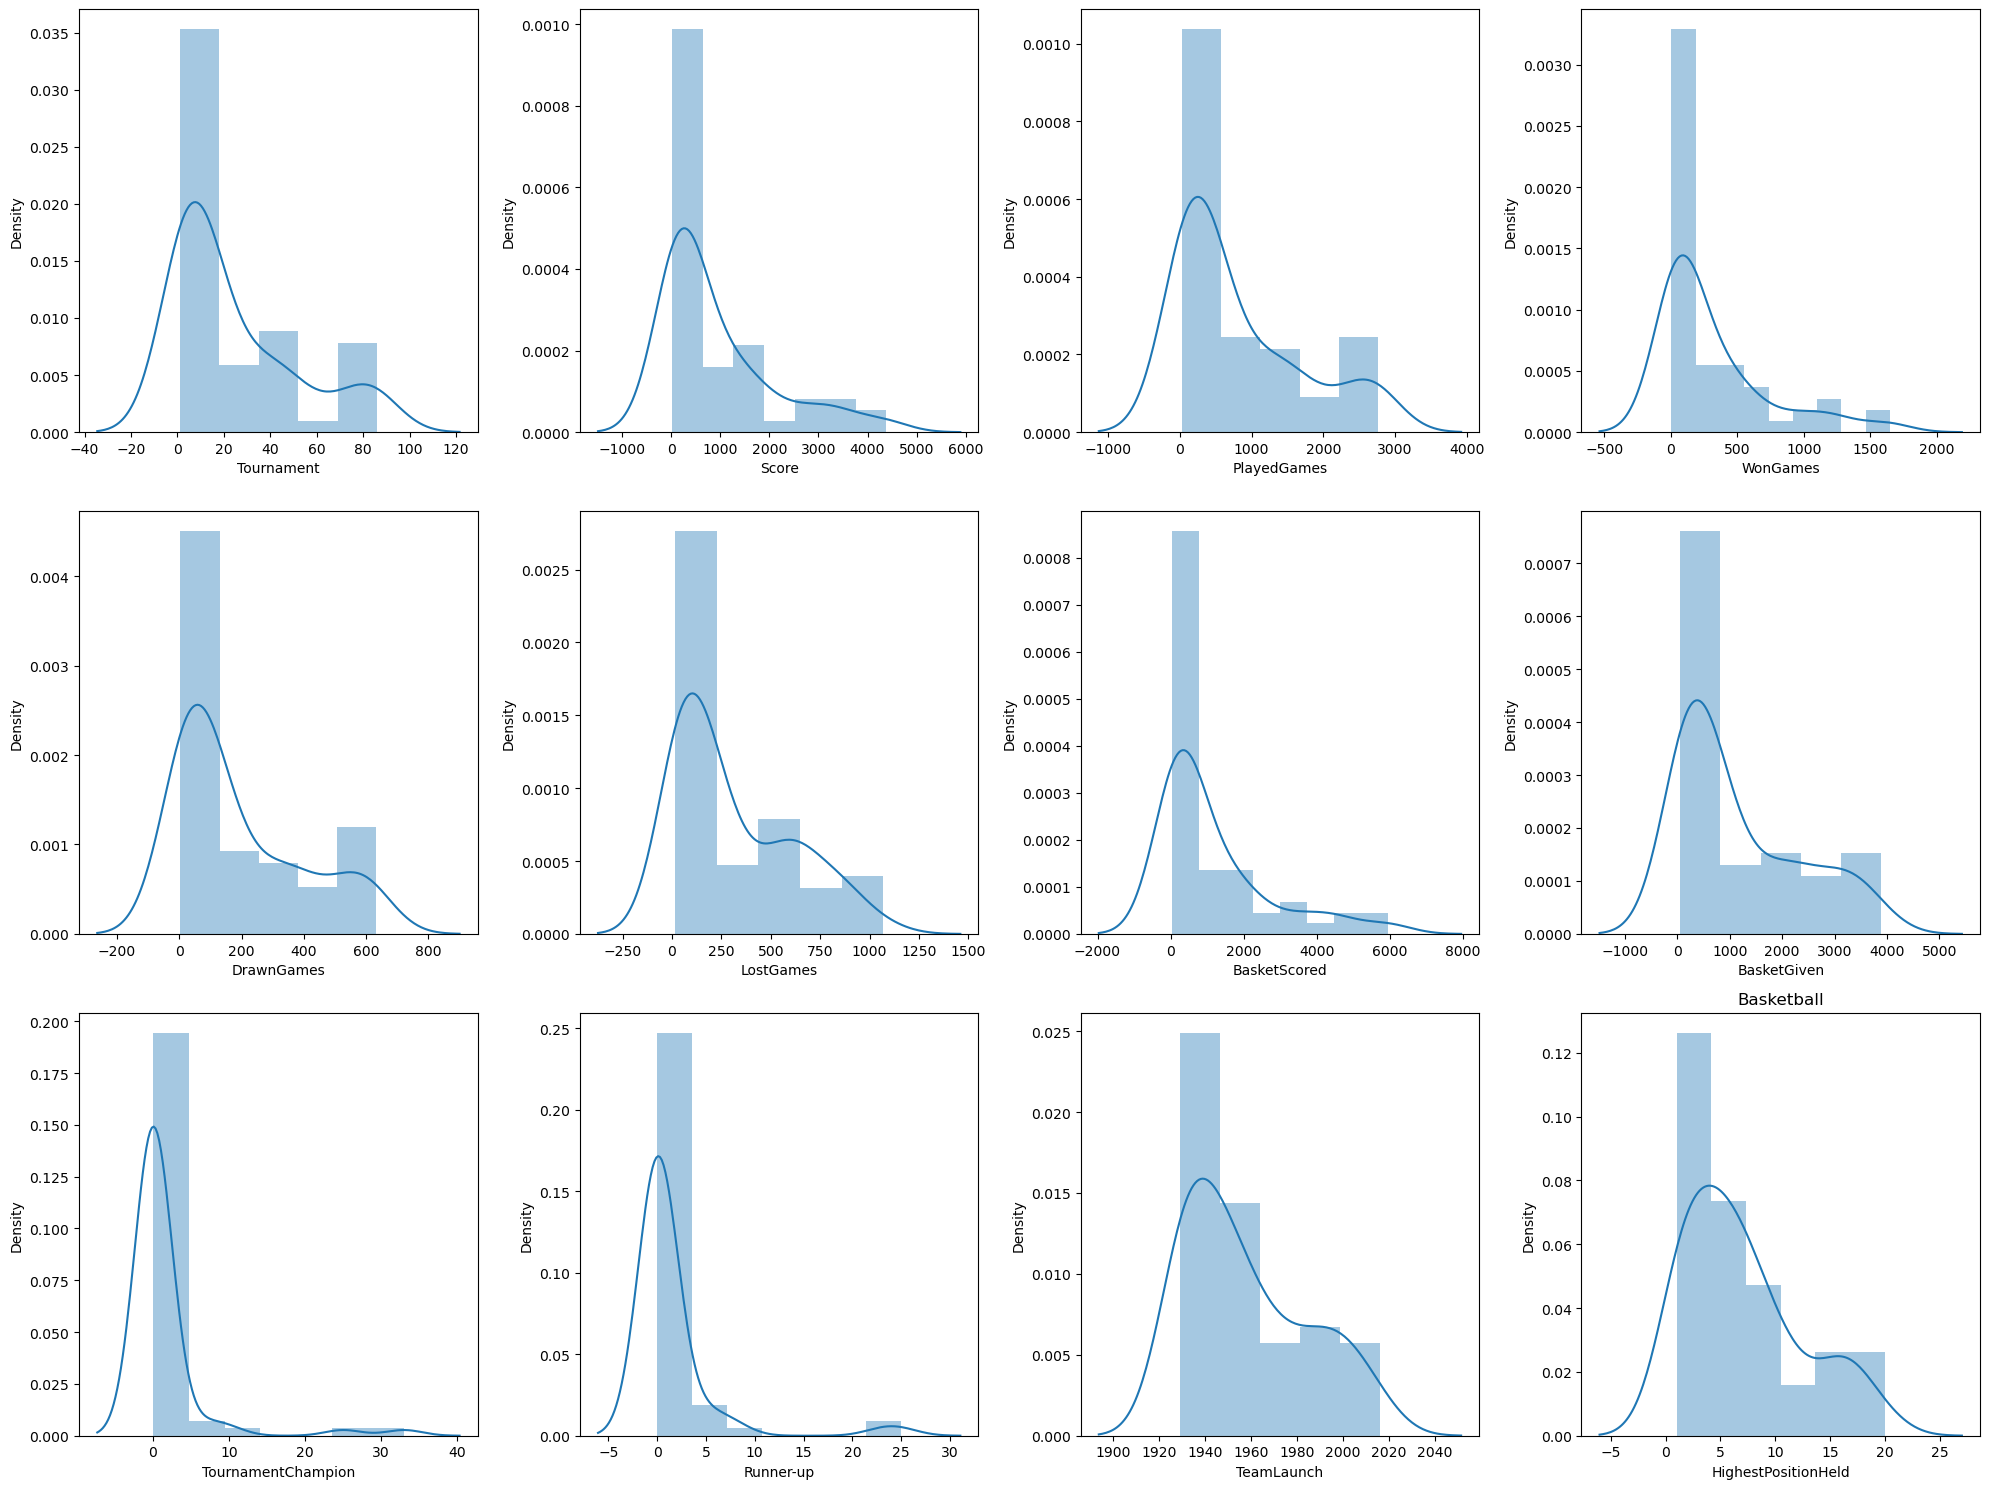

In [27]:
fig, ax = plt.subplots(3, 4, figsize = (20, 15))

for i, subplot in zip(cols, ax.flatten()):
    sns.distplot(df_new[i], ax = subplot, kde = True)
    plt.title('Basketball')
    
plt.tight_layout()
plt.show()

### Bivariate Analysis

In [28]:
df_new["Win_Percentage"] = round((df_new["WonGames"]/df_new["PlayedGames"]), 4) * 100
df_new["Loss_Percentage"] = round((df_new["LostGames"]/df_new["PlayedGames"]), 4) * 100
df_new["Tournament_Percentage"] = round((df_new["TournamentChampion"]/df_new["Tournament"]), 4) * 100
df_new["Runner-up_Percentage"] = round((df_new["Runner-up"]/df_new["Tournament"]), 4) * 100
df_new["Team_Year_2023"] = 2023 - df_new["TeamLaunch"]
df_new["Score_per_match"] = df_new["Score"]/df_new["Tournament"]
df_new["Average_BasketScored_Match"] = df_new["BasketScored"]/df_new["PlayedGames"]
df_new["Average_BasketGiven_Match"] = df_new["BasketGiven"]/df_new["PlayedGames"]

In [29]:
df_new.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,...,TeamLaunch,HighestPositionHeld,Win_Percentage,Loss_Percentage,Tournament_Percentage,Runner-up_Percentage,Team_Year_2023,Score_per_match,Average_BasketScored_Match,Average_BasketGiven_Match
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,...,1929,1,59.63,20.38,38.37,26.74,94,50.988372,2.153150,1.136857
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,...,1929,1,57.24,22.01,29.07,29.07,94,49.558140,2.136133,1.127444
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,...,1929,1,47.48,29.65,12.50,10.00,94,43.025000,1.734507,1.265876
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,...,1931,1,44.56,32.32,7.32,7.32,92,41.292683,1.650901,1.302177
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,...,1929,1,43.77,33.31,9.30,8.14,94,39.162791,1.676684,1.339609


Let's plot a scatter plot to find the relation between all numerical variables and win percentage which can be a factor to the performance of a team.

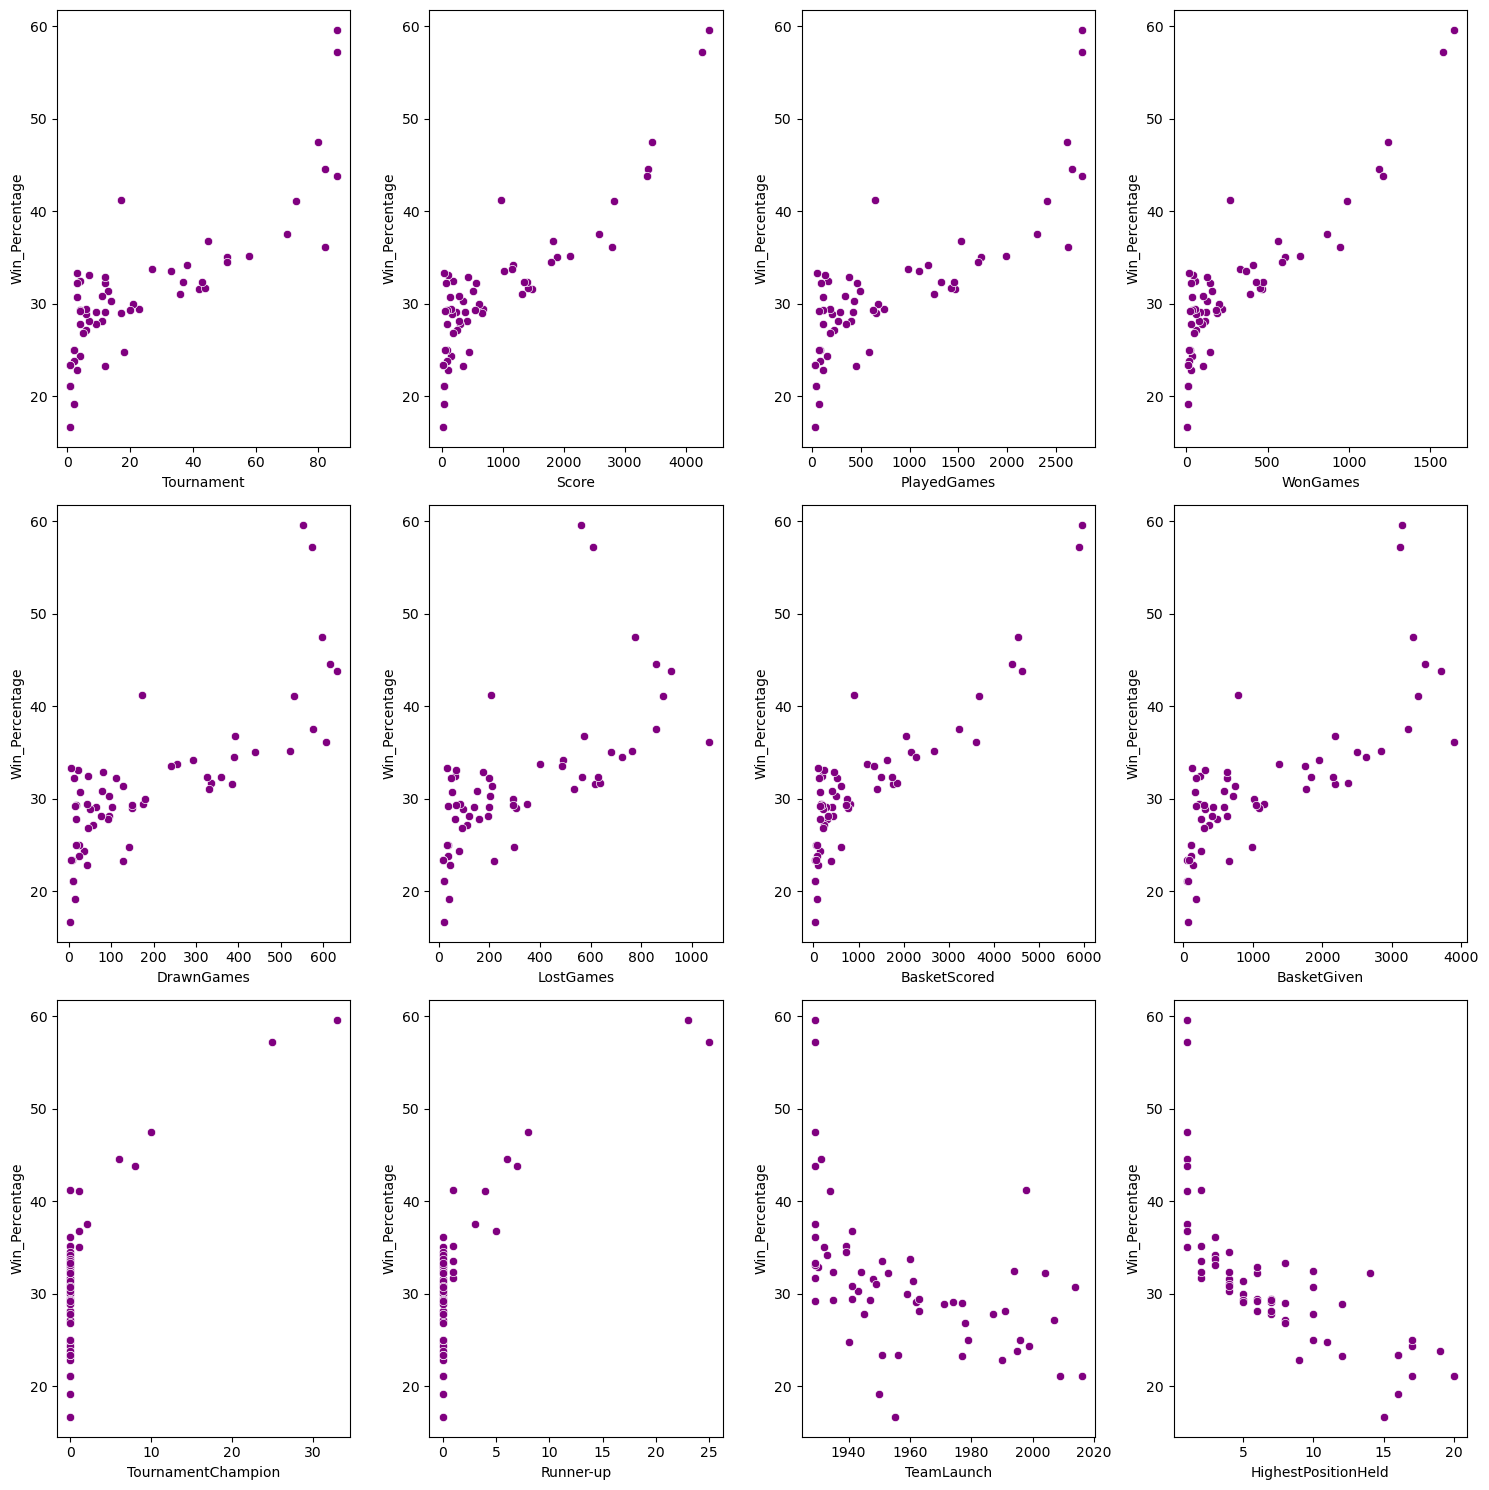

In [30]:
fig, ax = plt.subplots(3, 4, figsize = (15, 15))

for i, subplot in zip(cols, ax.flatten()):
    sns.scatterplot(x = df_new[i], y = df_new["Win_Percentage"], ax = subplot, color = 'purple')
    
plt.tight_layout()
plt.show()

Now let's plot a heatmap to find the relation between the variables.

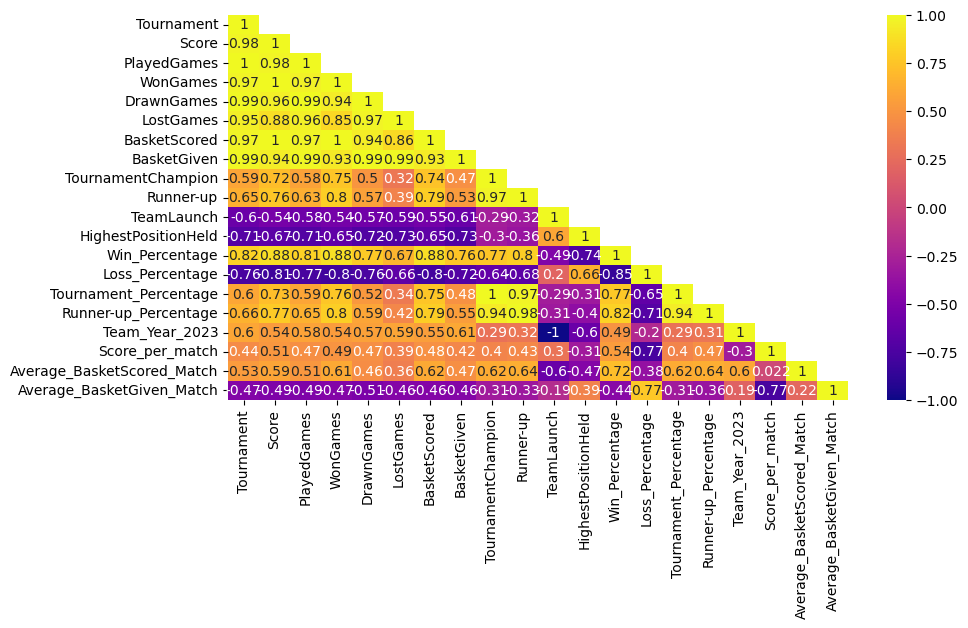

In [31]:
plt.figure(figsize = (10, 5))
sns.heatmap(df_new.corr(), annot = True, cmap = 'plasma', mask = np.triu(df_new.corr(), +1))
plt.show()

### Remove the Outliers

In [32]:
df_new.shape

(60, 21)

In [33]:
q1 = df_new.quantile(0.25)
q3 = df_new.quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

In [34]:
upper_limit

Tournament                      91.500000
Score                         3244.875000
PlayedGames                   3190.500000
WonGames                      1029.750000
DrawnGames                     789.375000
LostGames                     1314.625000
BasketScored                  3942.625000
BasketGiven                   4649.125000
TournamentChampion               0.000000
Runner-up                        0.000000
TeamLaunch                    2041.000000
HighestPositionHeld             20.500000
Win_Percentage                  42.441250
Loss_Percentage                 59.635000
Tournament_Percentage            0.000000
Runner-up_Percentage             0.000000
Team_Year_2023                 152.000000
Score_per_match                 58.983554
Average_BasketScored_Match       1.791585
Average_BasketGiven_Match        2.074541
dtype: float64

In [35]:
lower_limit

Tournament                     -48.500000
Score                        -1780.125000
PlayedGames                  -1729.500000
WonGames                      -562.250000
DrawnGames                    -431.625000
LostGames                     -688.375000
BasketScored                 -2118.375000
BasketGiven                  -2411.875000
TournamentChampion               0.000000
Runner-up                        0.000000
TeamLaunch                    1871.000000
HighestPositionHeld             -7.500000
Win_Percentage                  18.711250
Loss_Percentage                 30.055000
Tournament_Percentage            0.000000
Runner-up_Percentage             0.000000
Team_Year_2023                 -18.000000
Score_per_match                  6.173504
Average_BasketScored_Match       0.632160
Average_BasketGiven_Match        1.013142
dtype: float64

### Team vs Win Percentage

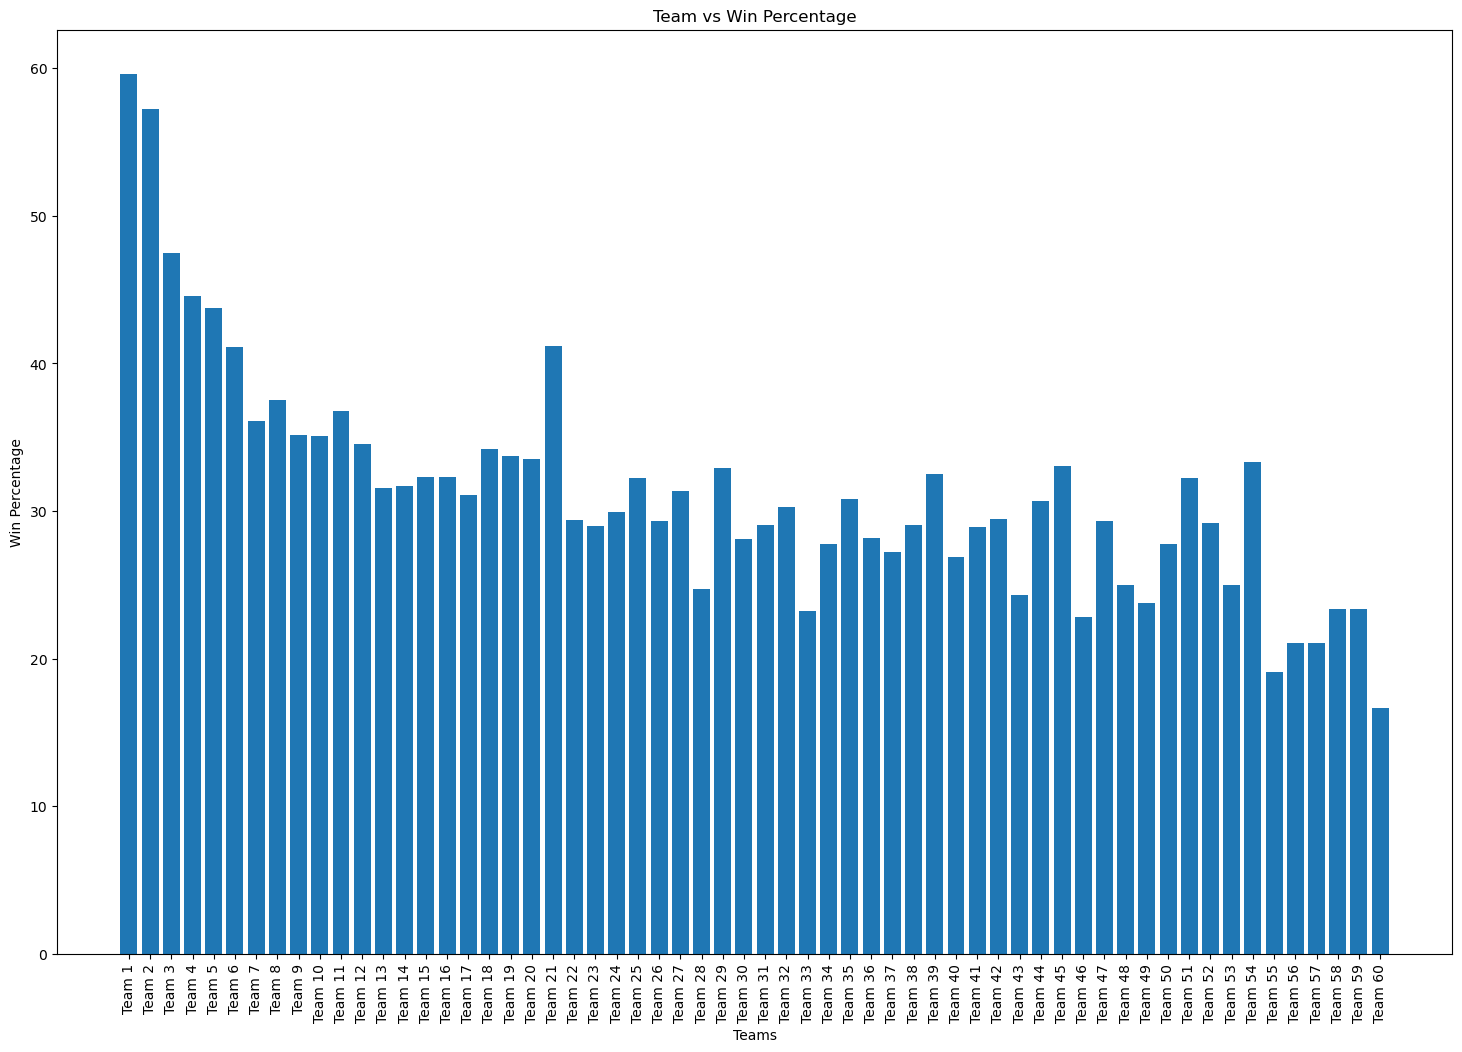

In [36]:
plt.figure(figsize=(18, 12))
plt.bar(x = df_new["Team"], height = df_new["Win_Percentage"])
plt.title("Team vs Win Percentage")
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Win Percentage")
plt.show()

Based on the win percentage, Team1, Team2, Team3, Team4 and Team5 are the best teams.

### Team vs Loss Percentage

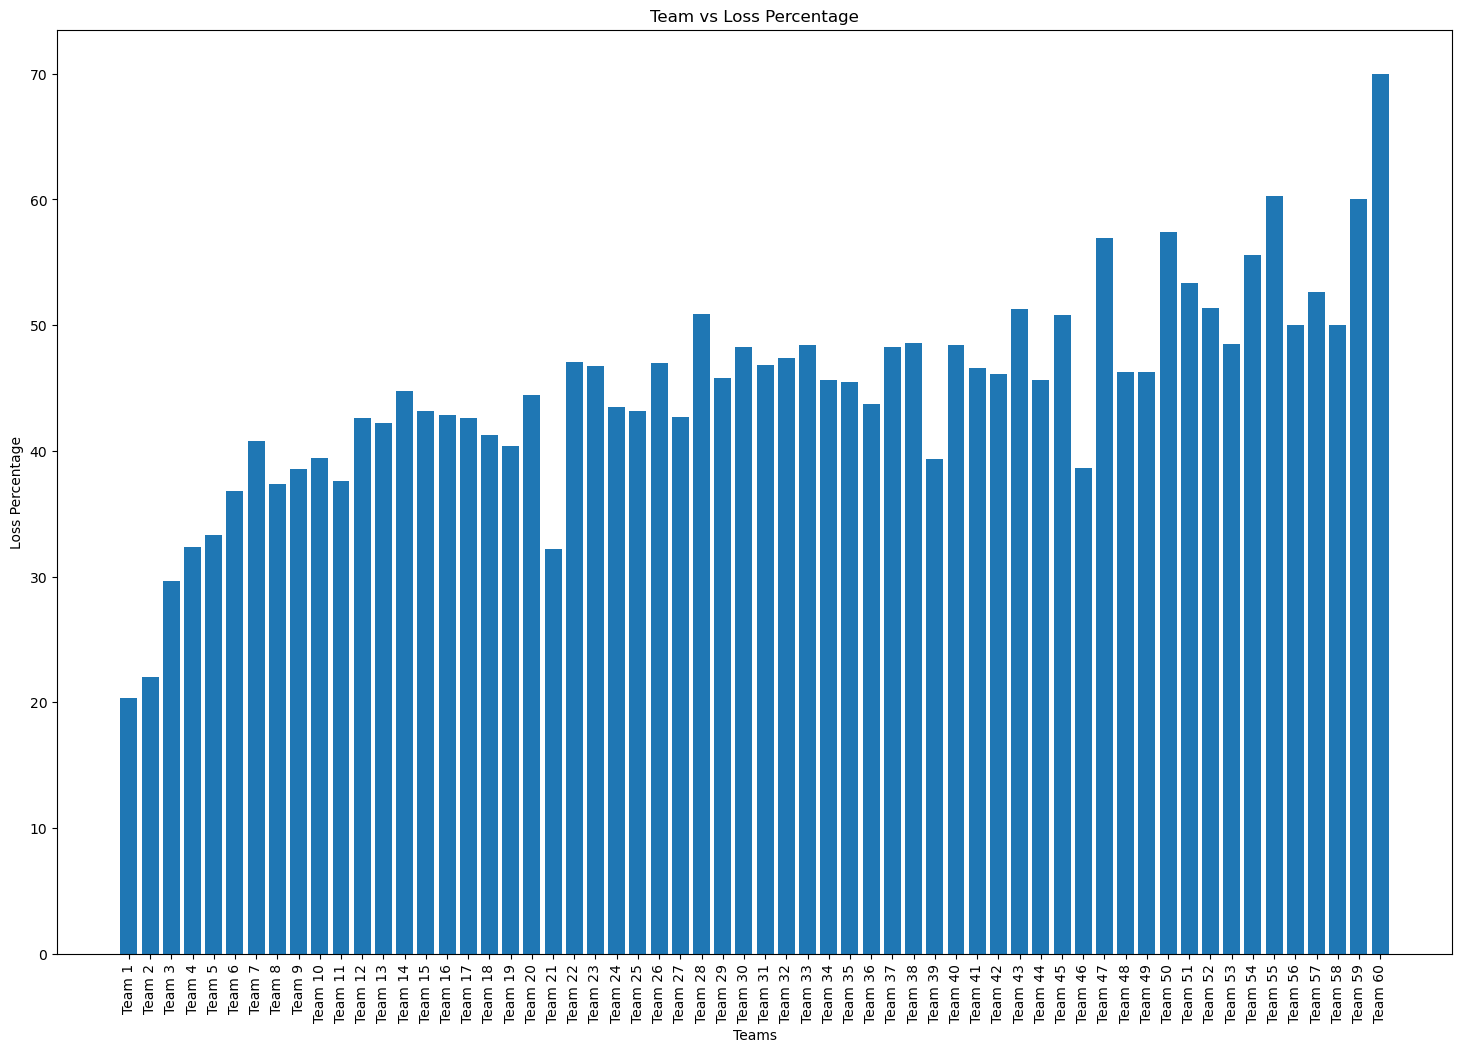

In [37]:
plt.figure(figsize=(18, 12))
plt.bar(x = df_new["Team"], height = df_new["Loss_Percentage"])
plt.title("Team vs Loss Percentage")
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Loss Percentage")
plt.show()

Based on the loss percentage, Team1, Team2, Team3, Team4 and Team21 are the best teams since they have the less loss percentage.

### Team vs Tournament Win Percentage

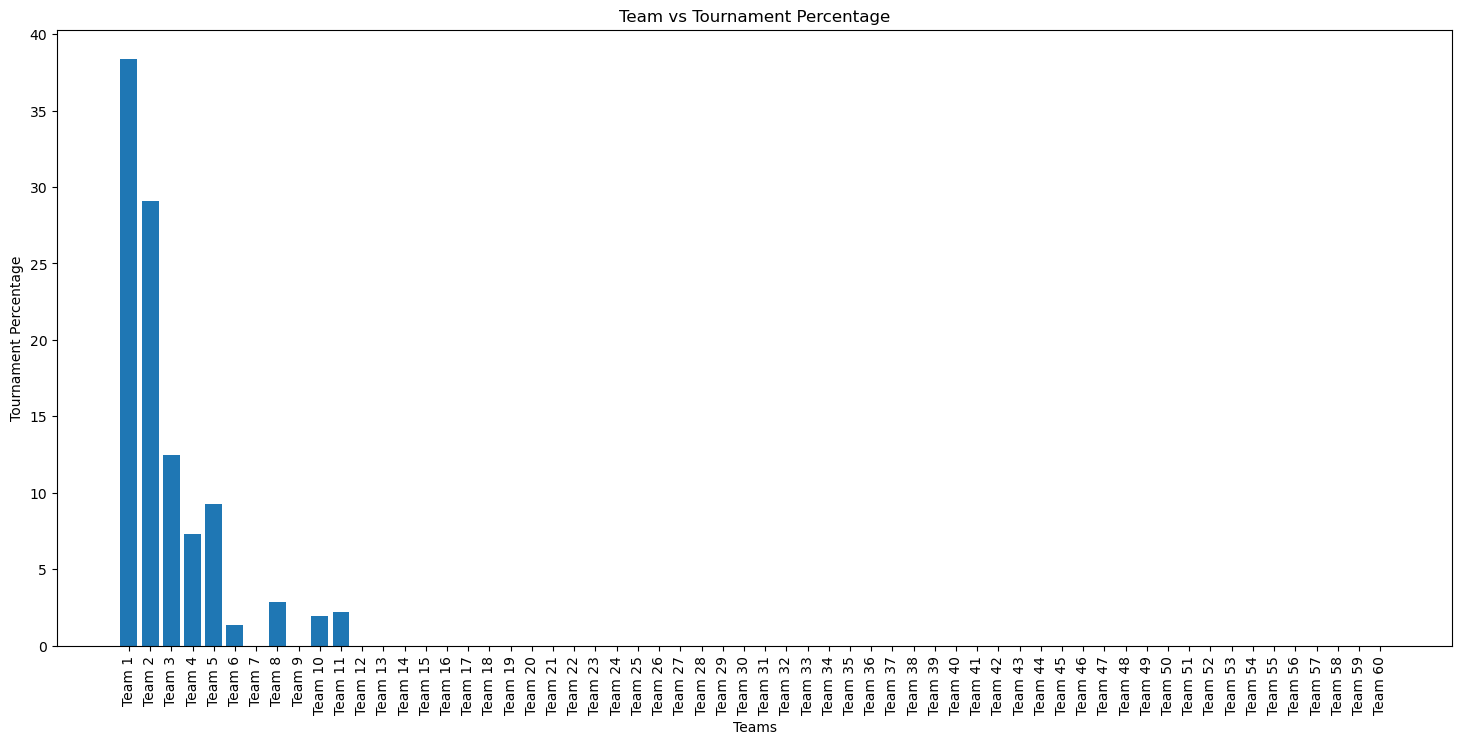

In [38]:
plt.figure(figsize=(18, 8))
plt.bar(x = df_new["Team"], height = df_new["Tournament_Percentage"])
plt.title("Team vs Tournament Percentage")
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Tournament Percentage")
plt.show()

Based on the tournament winning percentage, Team1, Team2, Team3, Team4 and Team5 are the best teams with best tournament winning percentage.

### Team vs Runner up Percentage

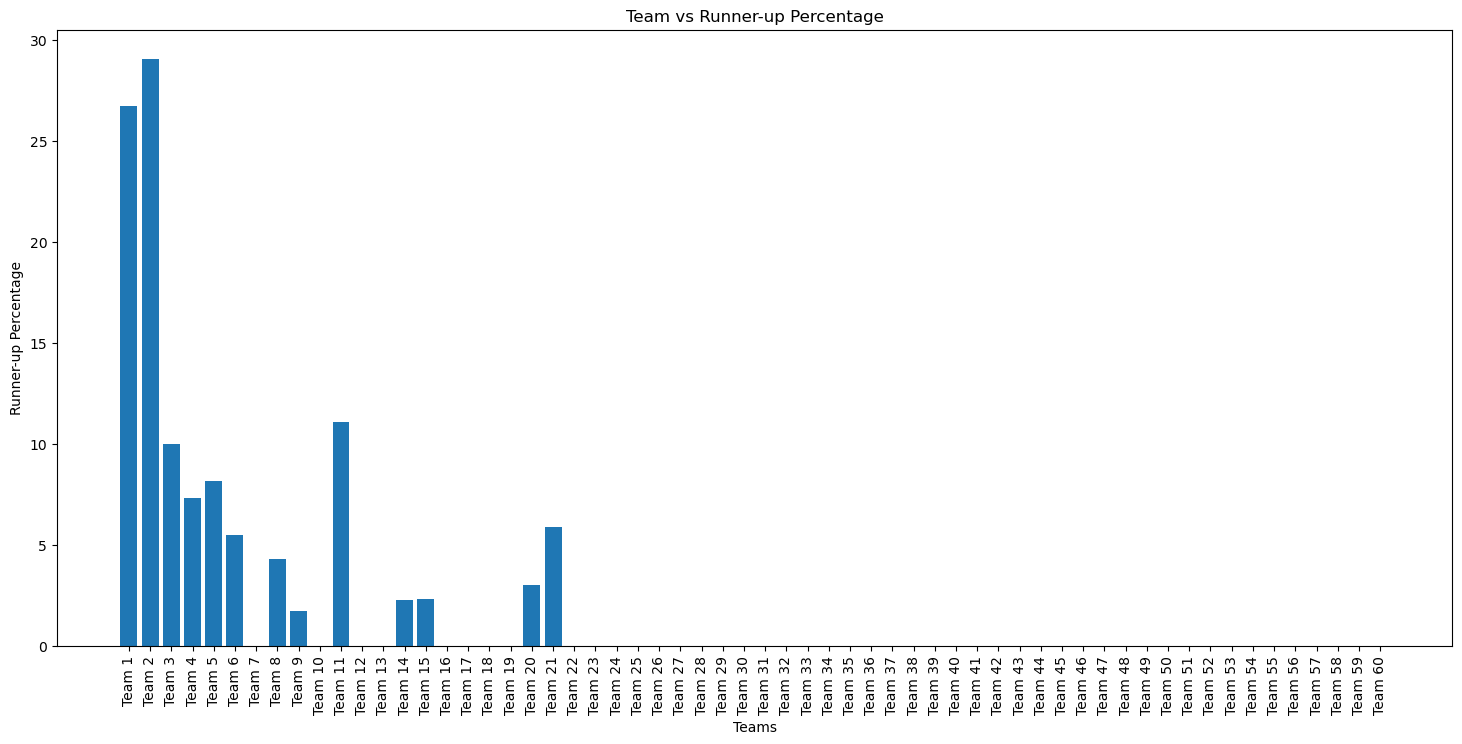

In [39]:
plt.figure(figsize=(18, 8))
plt.bar(x = df_new["Team"], height = df_new["Runner-up_Percentage"])
plt.title("Team vs Runner-up Percentage")
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Runner-up Percentage")
plt.show()

Based on the runner up percentage, Team1, Team2, Team11, Team3 and Team5 are the best teams with best tournament winning percentage.

### Team vs  Average Basket Scored Per Match

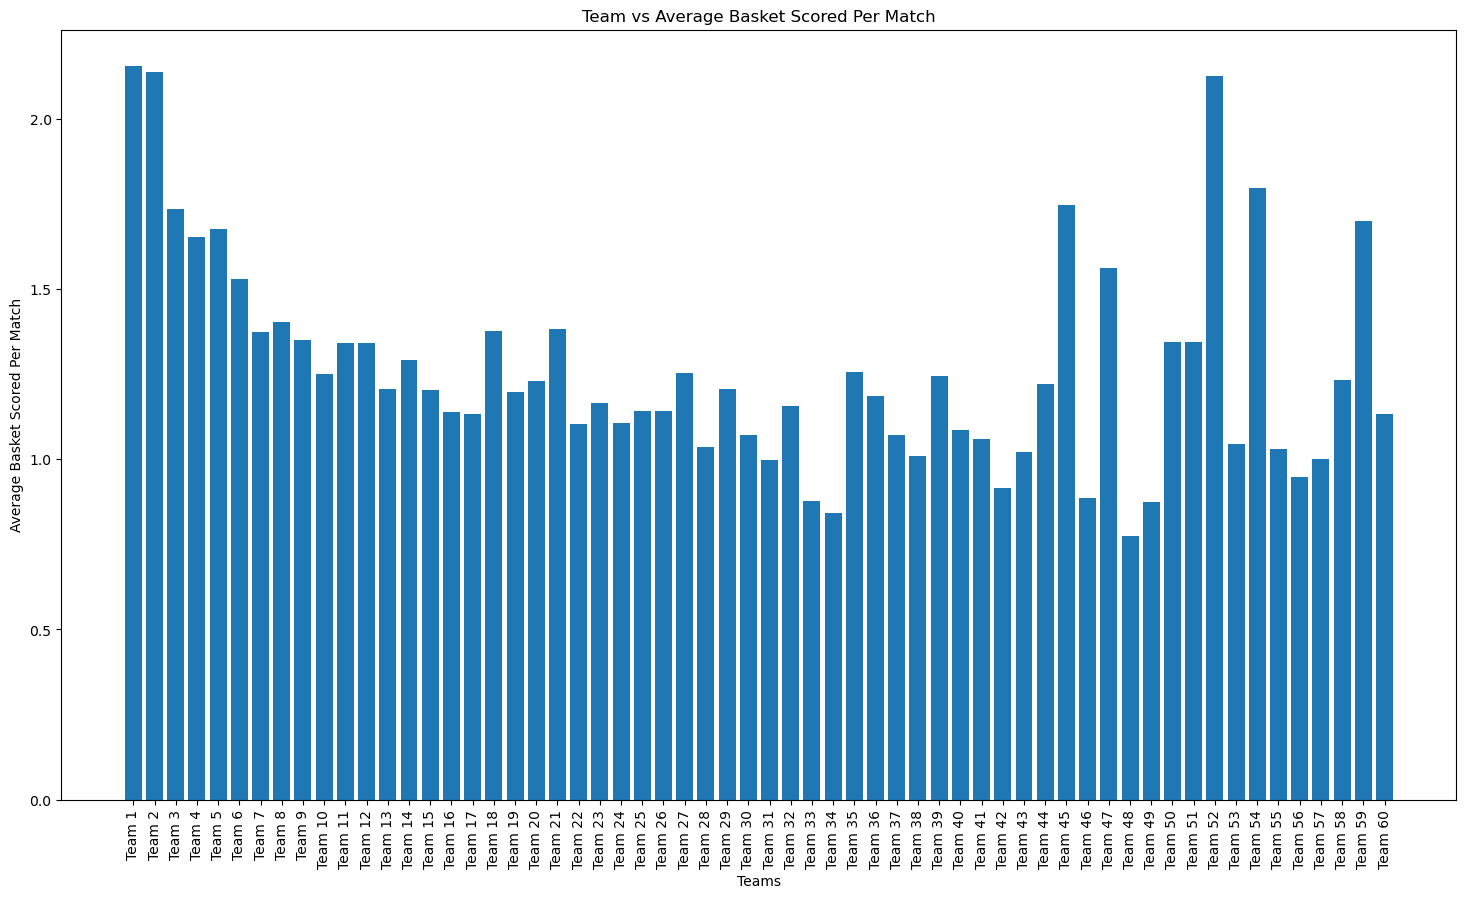

In [40]:
plt.figure(figsize=(18, 10))
plt.bar(x = df_new["Team"], height = df_new["Average_BasketScored_Match"])
plt.title("Team vs Average Basket Scored Per Match")
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Average Basket Scored Per Match")
plt.show()

Based on average basket scored per match, we have Team1, Team2, Team52, Team45 and Team54 are the best teams.

### Team vs  Average Basket Given Per Match

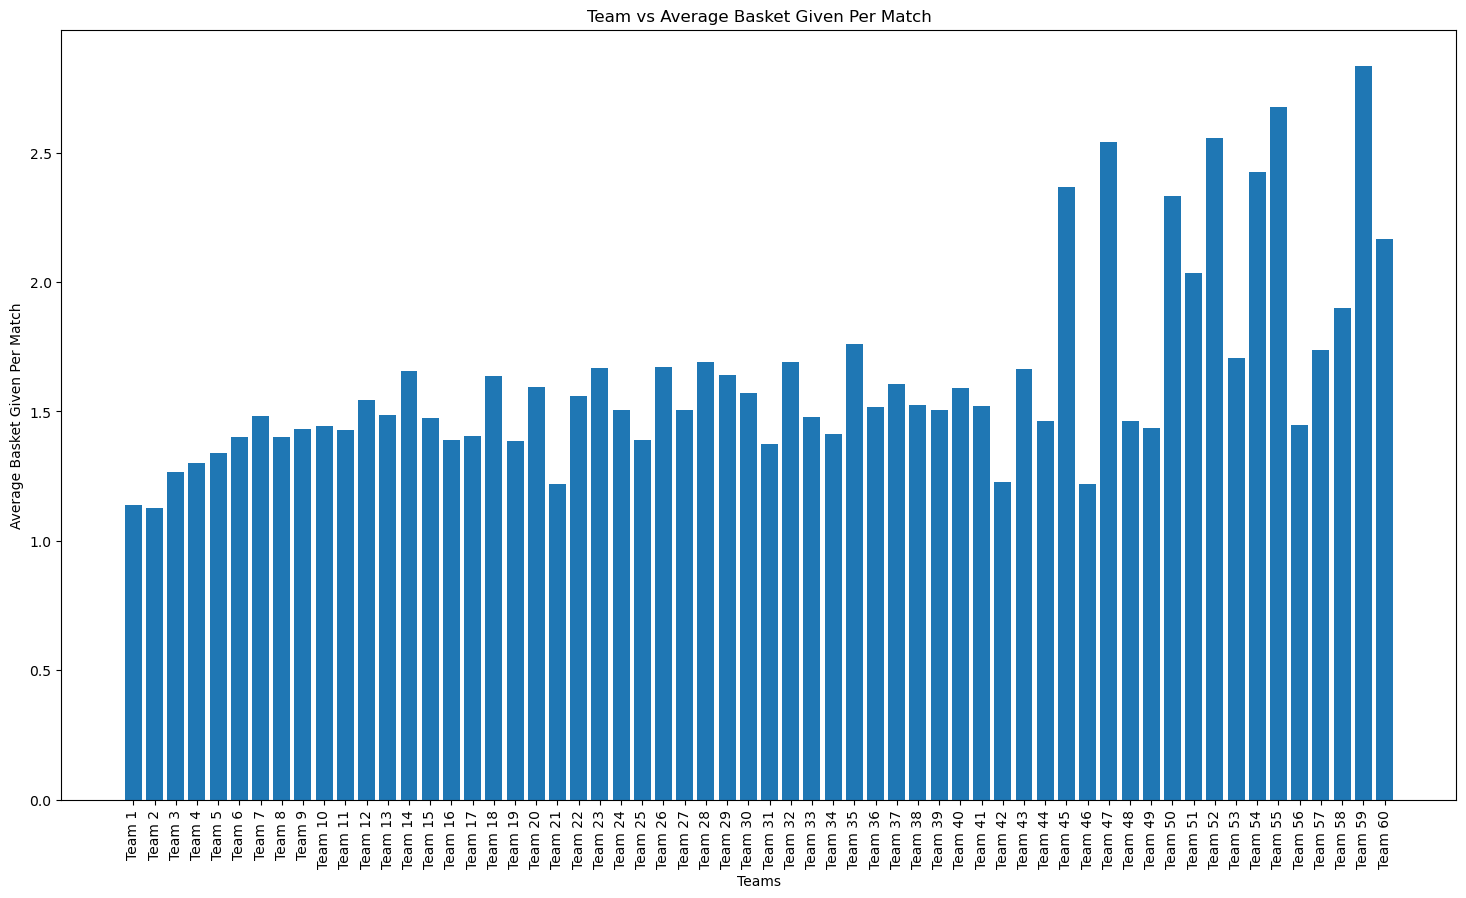

In [41]:
plt.figure(figsize=(18, 10))
plt.bar(x = df_new["Team"], height = df_new["Average_BasketGiven_Match"])
plt.title("Team vs Average Basket Given Per Match")
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Average Basket Given Per Match")
plt.show()

Based on average basket given per match, we have Team1, Team2, Team21, Team42 and Team46 are the best teams as they have given only few baskets.

### Age of Teams

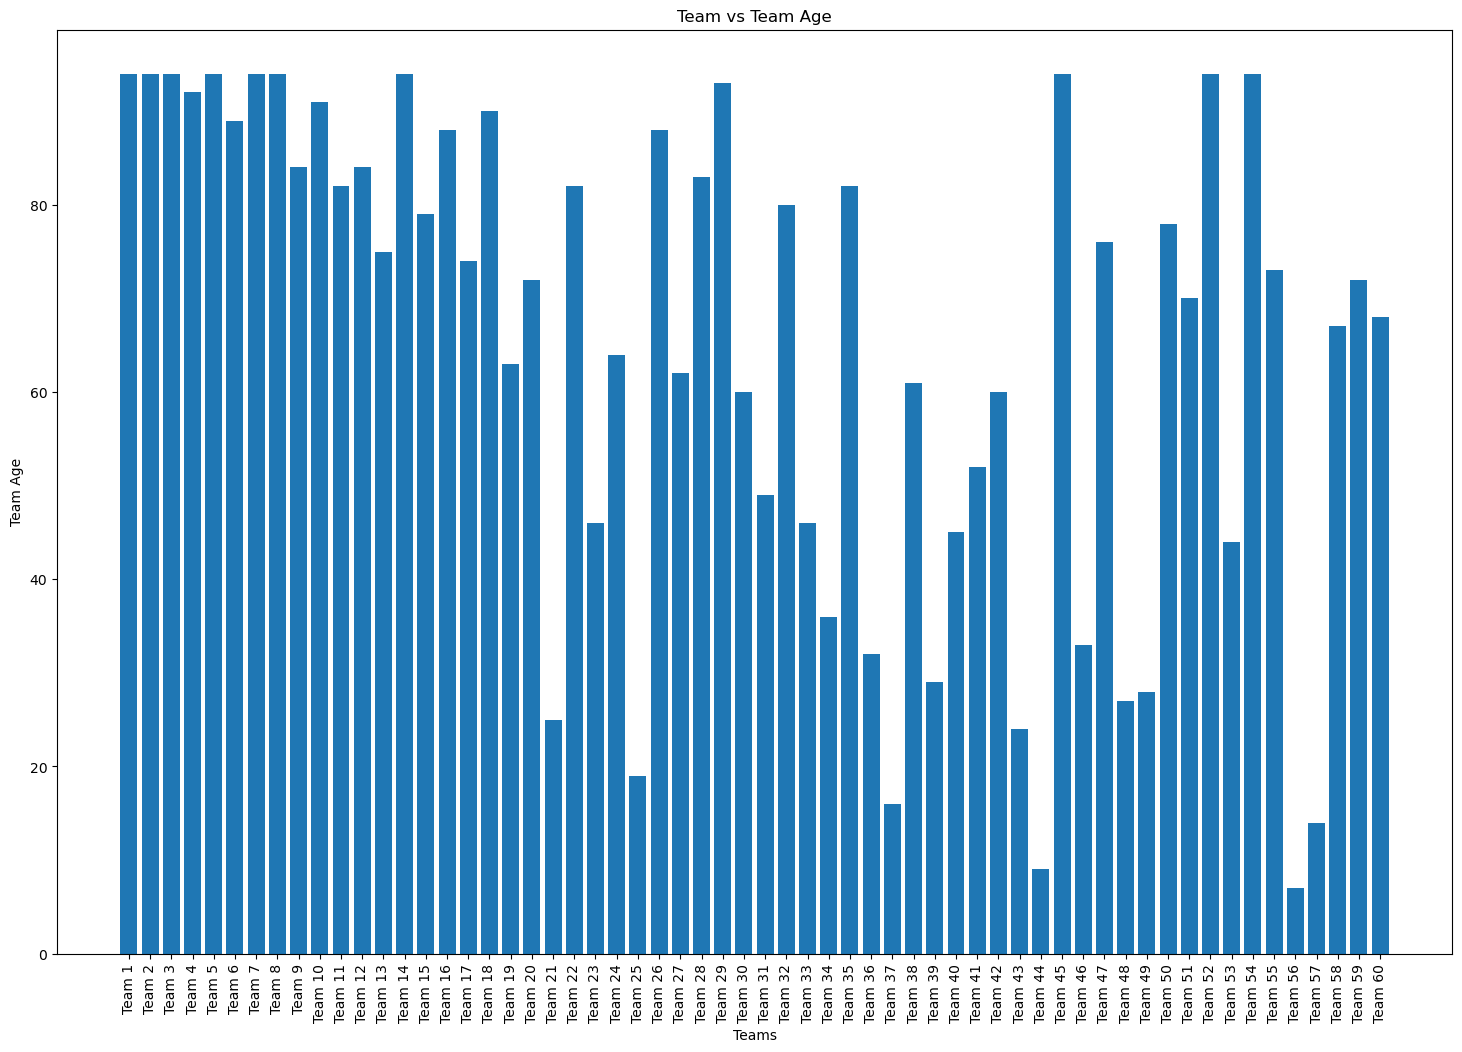

In [42]:
plt.figure(figsize=(18, 12))
plt.bar(x = df_new["Team"], height = df_new["Team_Year_2023"])
plt.title("Team vs Team Age")
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Team Age")
plt.show()

There are a few teams which are dominating in this game and they are actually old teams. Few teams like team21 are newly formed teams and they are also performing well.

### Conclusion

* From the above we can see that the Team1 has a good history. They are champions of the tournament for a record 33 times and runner up for 23 times. Team2 can also boast a similar record. Basically both these teams are dominating the tournament. So the Company X can approch Team 1 or Team 2 which will be a deal win for them.




* If the Company X wants do somthing different they can approch Team 21 or Team46 as those are upcoming teams in this tournament. 
* So the Company X can approch Team 1 or Team 2 which will be a deal win for them. If the Company X wants do somthing different they can approch Team 21 as it is an upcoming team in this tournament because inspite of playing lesser number of tournament(17), lesser number of games(646) and and finishing in the second position only one time they are in the top ten best team.
    1. The team is in ranked 6th based Win Percentage (Most)
    2. The team is in ranked 4th based Loss Percentage (Least)
    3. The team is in ranked 8th based BasketScoredPerGame (Most)
    4. The team is in ranked 3th based BasketGivenPerGame(Least)
